In [1]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


from sklearn.linear_model import LogisticRegression as Model

In [2]:
from sklearn.svm import LinearSVC as Model

Read in the Kobe Bryant shooting data [https://www.kaggle.com/c/kobe-bryant-shot-selection]

In [3]:
kobe = pd.read_csv('kobe.csv')
kobe.dropna(inplace=True)

In [4]:
kobe.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

For now, use just the numerical datatypes. They are below as `num_columns`

In [5]:
kobe

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,Driving Layup Shot,Layup,382,49900088,34.0443,0,0,-118.2698,7,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30692
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696


In [6]:
kobe.shot_made_flag.value_counts(normalize=True)

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

In [7]:
kobe.shot_made_flag.value_counts(normalize=False)

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

In [8]:
num_columns = [col for col, dtype in zip(kobe.columns, kobe.dtypes) if dtype != 'object']
num_columns

['game_event_id',
 'game_id',
 'lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'team_id',
 'shot_id']

## The `shot_made_flag` is the result (0 or 1) of the shot that Kobe took. Some of the values are missing (e.g. `NaN`) but we *_dropped_* them.

<AxesSubplot:xlabel='loc_x', ylabel='loc_y'>

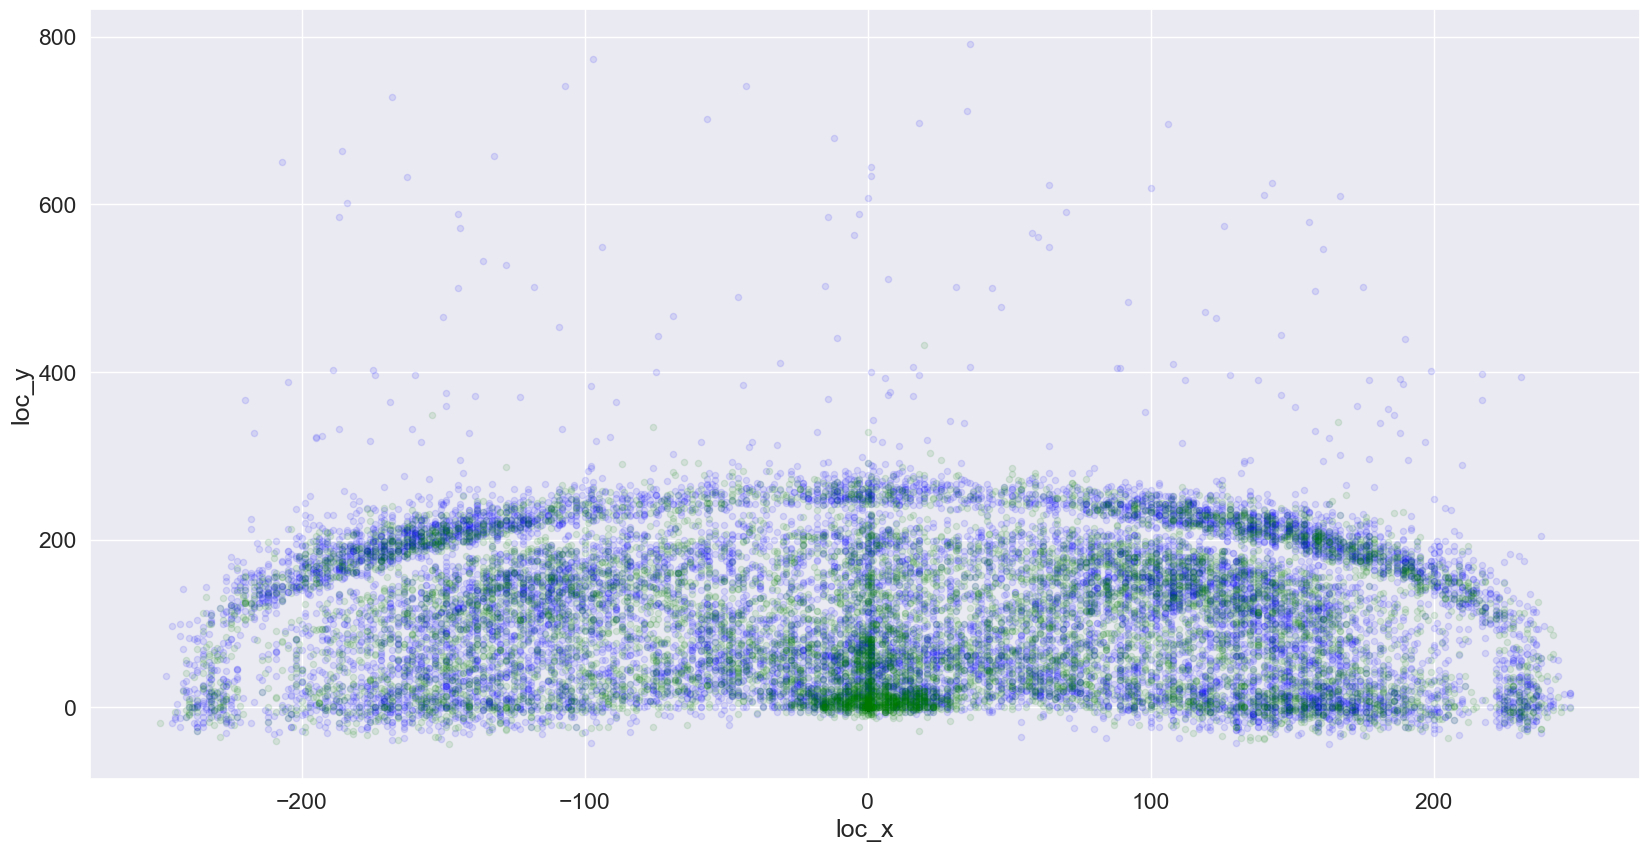

In [9]:
fig, ax = plt.subplots()
kobe[kobe.shot_made_flag==0].plot(kind='scatter', x='loc_x', y='loc_y', color='blue', alpha=0.1, ax=ax)
kobe[kobe.shot_made_flag==1].plot(kind='scatter', x='loc_x', y='loc_y', color='green', alpha=0.1, ax=ax)
# plt.scatter(kobe.loc_x, kobe.loc_y, alpha=0.2)

<AxesSubplot:>

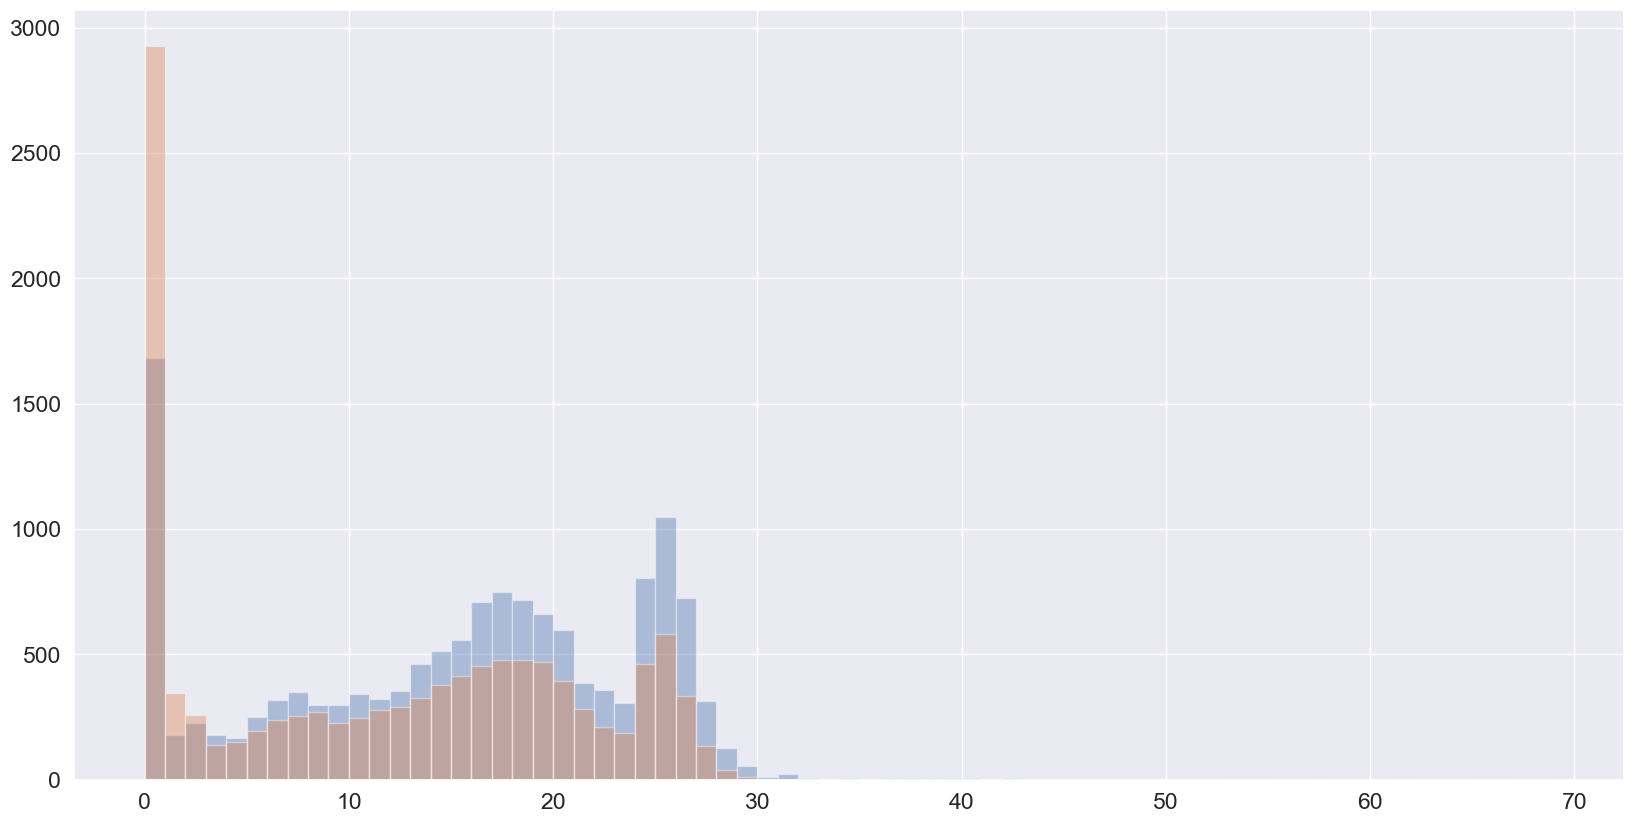

In [10]:
kobe[kobe.shot_made_flag==0].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[kobe.shot_made_flag==1].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

<AxesSubplot:>

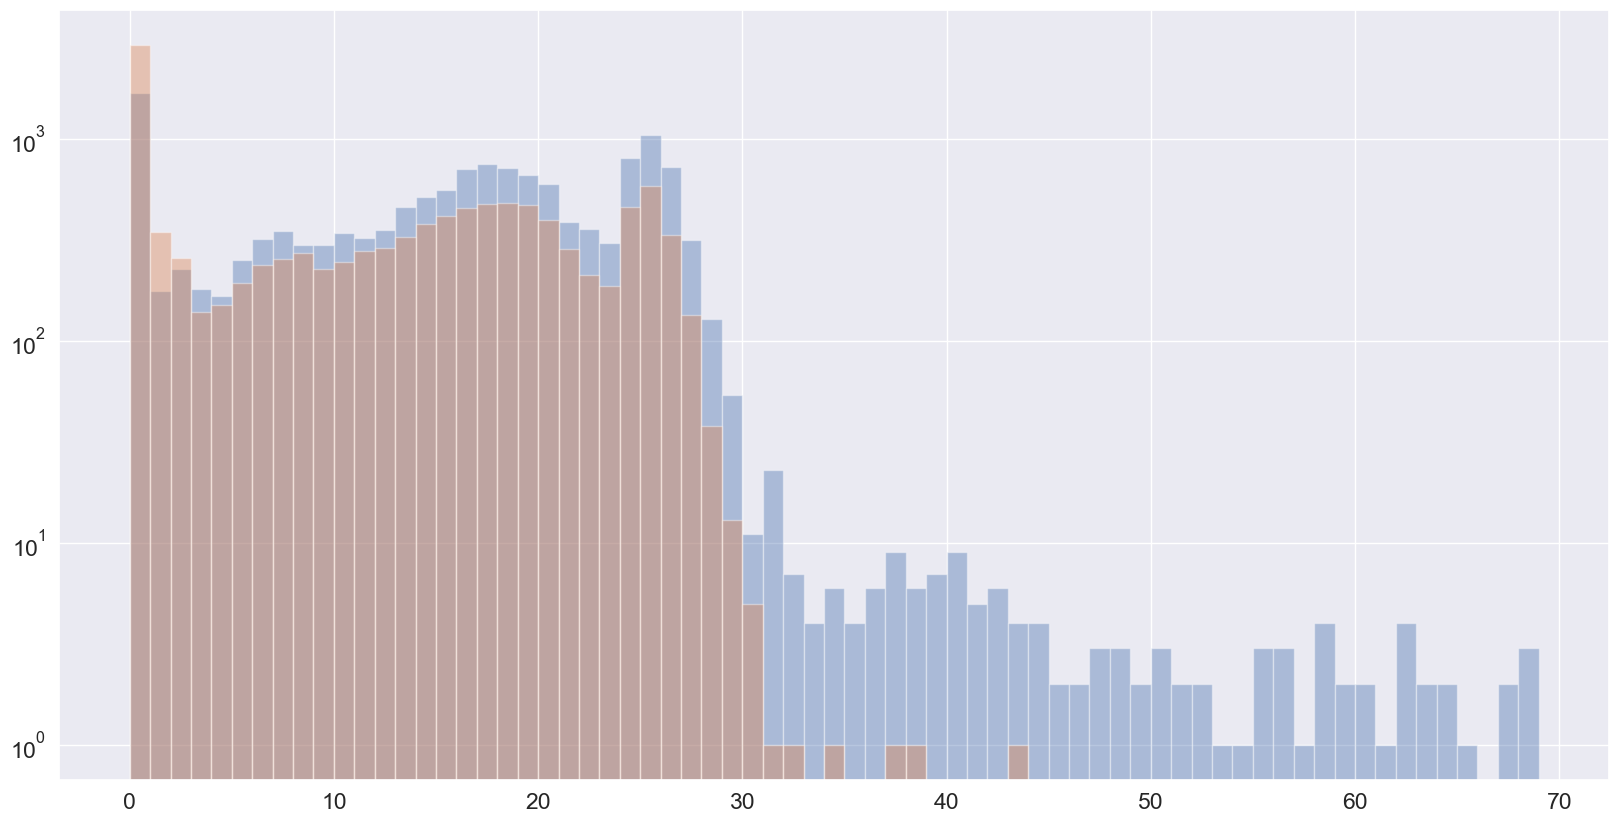

In [11]:
kobe[kobe.shot_made_flag==0].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4, log=True)
kobe[kobe.shot_made_flag==1].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4, log=True)

In [12]:
# fit a linear regression model and store the predictions
feature_cols = ['shot_distance', 'minutes_remaining']
X = kobe[feature_cols]
y = kobe.shot_made_flag

model = Model()
model.fit(X, y)
kobe['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(kobe.shot_made_flag, kobe.pred.round())


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6074639062925633

In [13]:
distances = np.arange(-100, 100)
minutes = np.array([0]*200)
x_trial = np.column_stack((distances, minutes))
model.predict_proba(x_trial)
plt.scatter(distances, model.predict_proba(x_trial)[:,1])

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

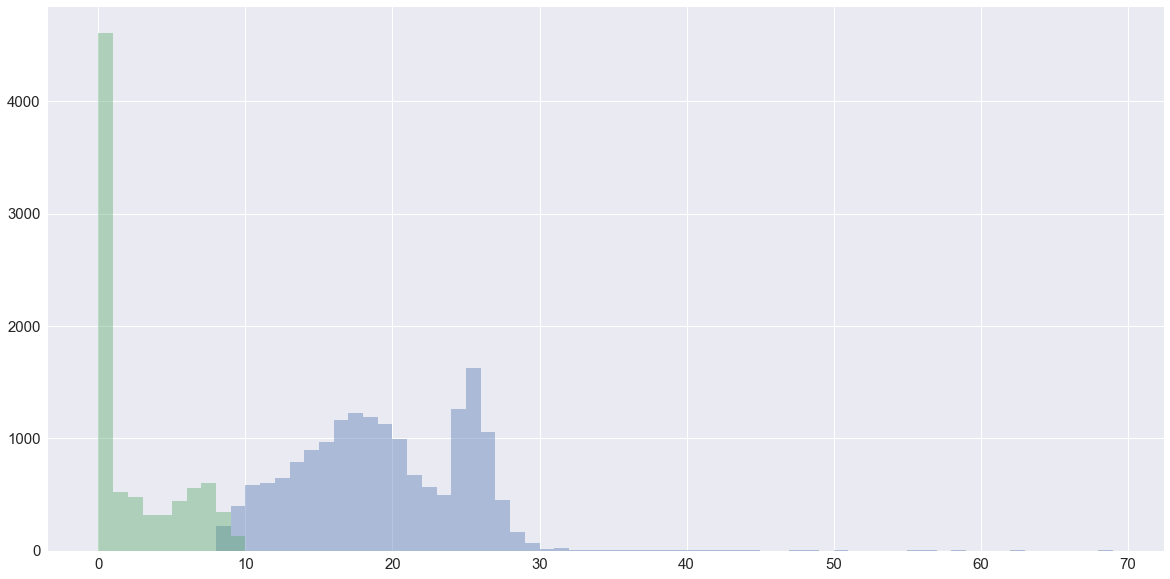

In [39]:
kobe[(kobe.pred==0)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[(kobe.pred==1)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

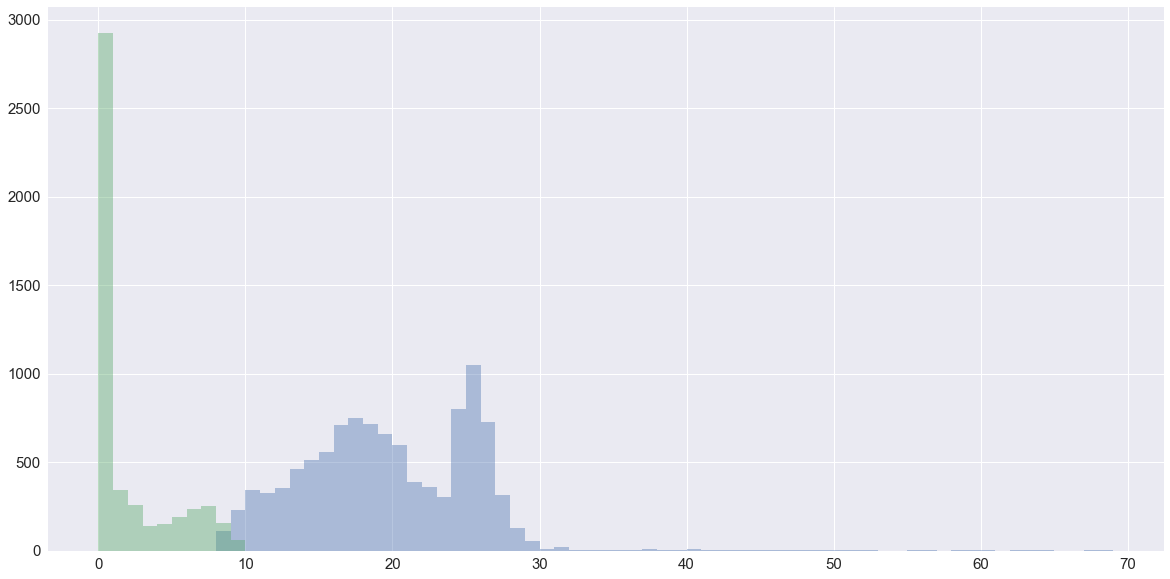

In [37]:
kobe[(kobe.pred==0) & (kobe.shot_made_flag==0)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[(kobe.pred==1) & (kobe.shot_made_flag==1)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

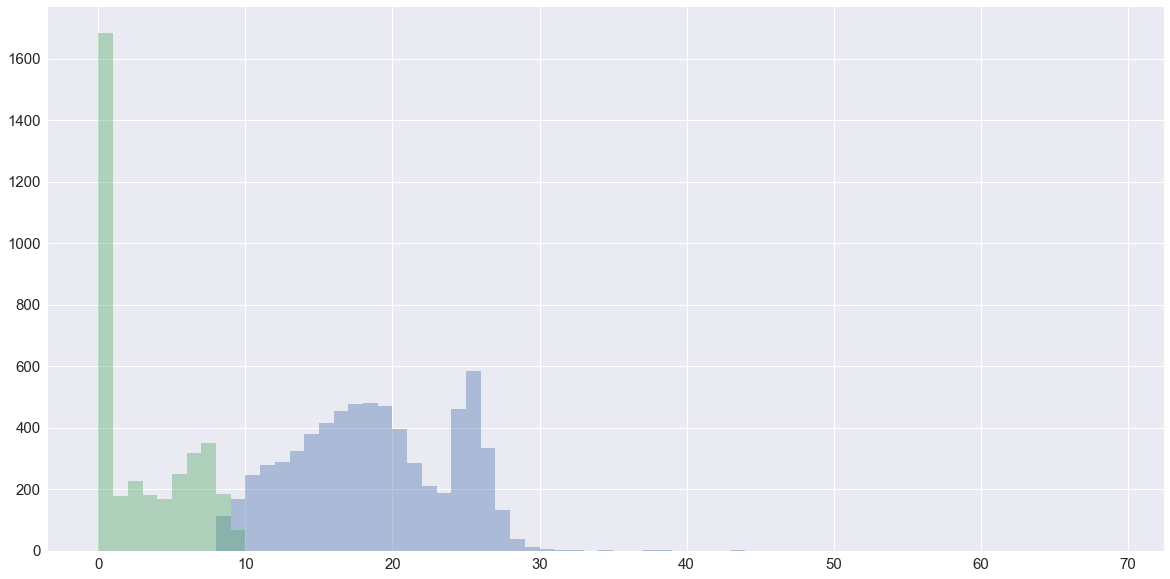

In [38]:
kobe[(kobe.pred==0) & (kobe.shot_made_flag==1)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[(kobe.pred==1) & (kobe.shot_made_flag==0)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

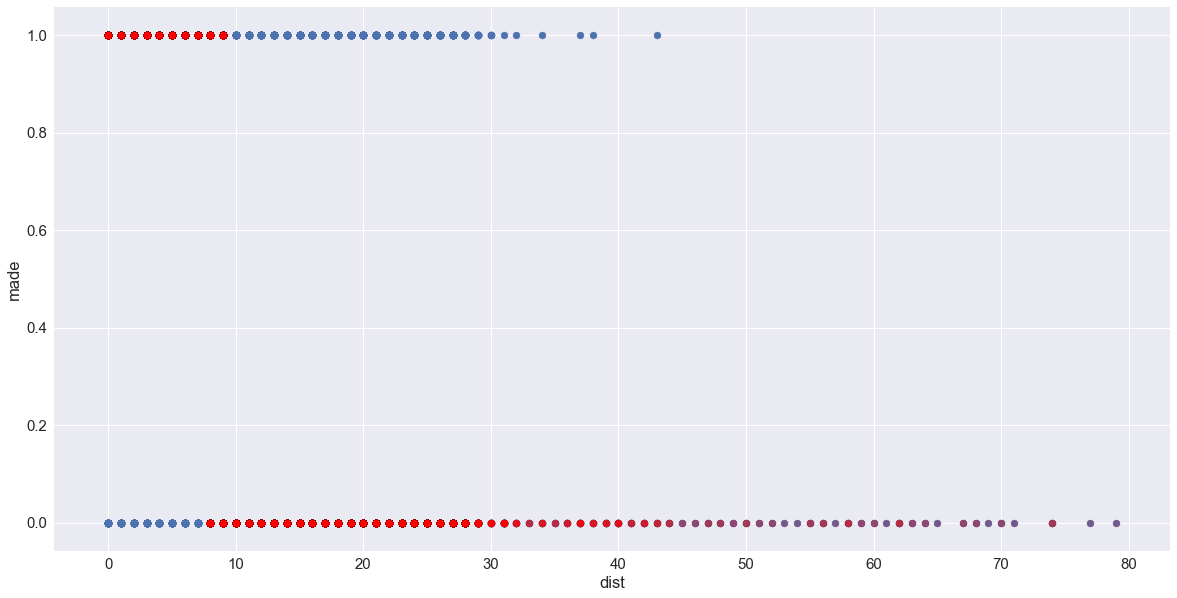

In [23]:
# scatter plot that includes the regression line
plt.scatter(kobe.shot_distance, kobe.shot_made_flag)
plt.scatter(kobe.shot_distance, kobe.pred, color='red', alpha=.2)
plt.xlabel('dist')
plt.ylabel('made')

## The following is a reminder of how the SciKit-Learn Models can be interfaced

0.5

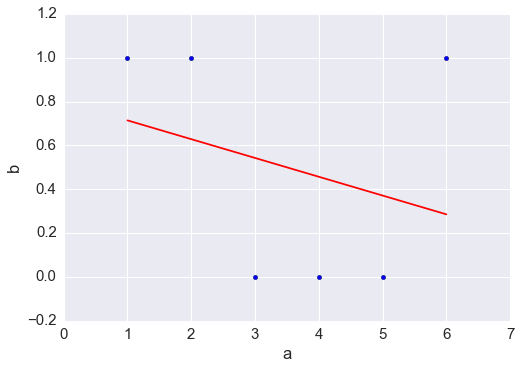

In [45]:
# fit a linear regression model and store the predictions
example = pd.DataFrame({'a':[1,2,3,4,5,6], 'b':[1,1,0,0,0,1]})
feature_cols = ['a']
X = example[feature_cols]
y = example.b
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
example['pred'] = model.predict(X)
# scatter plot that includes the regression line
plt.scatter(example.a, example.b)
plt.plot(example.a, example.pred, color='red')
plt.xlabel('a')
plt.ylabel('b')

from sklearn.metrics import accuracy_score
accuracy_score(example.b, example.pred.astype(int))


In [ ]:
from sklearn.linear_model import LogisticRegression as Model
# from sklearn.tree import DecisionTreeClassifier as Model
# from sklearn.ensemble import RandomForestClassifier as Model
model = Model()

from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )
from sklearn.metrics import *
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.4, random_state=0)

cross_validation.cross_val_score(model, X, y, cv=10)


In [10]:
kobe.period.value_counts()

3    7002
1    6700
4    6043
2    5635
5     280
6      30
7       7
Name: period, dtype: int64

In [14]:
kobe[kobe.period==7].minutes_remaining.value_counts()

2    2
0    2
4    1
3    1
1    1
Name: minutes_remaining, dtype: int64

In [21]:
kobe[(kobe.minutes_remaining==0) & (kobe.period==4)].shot_made_flag.value_counts(normalize=True)

0.0    0.64026
1.0    0.35974
Name: shot_made_flag, dtype: float64

In [22]:
kobe.shot_made_flag.value_counts(normalize=True)

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64